In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

%matplotlib inline

In [2]:
# Create required dataframe format

df = pd.DataFrame(columns=['Producer execution time','Consumer execution time', 'Producer Throughput', 'Consumer Throughput'])

In [3]:
def get_exec(path):
    
    # Get producer execution time
    f = open(path + '/producer.txt','r')
    prod_exec_time = float(f.readlines()[0].strip().split(':')[1].strip())
    f.close()
    
    # Get consumer execution time
    cons = glob.glob(path + '/consumer*.txt')
    cons_exec = []
    for c in cons:
        f = open(c,'r')
        cons_exec.append(float(f.readlines()[0].strip().split(':')[1].strip().split(' ')[0].strip()))
    f.close()
    cons_exec_time = sum(cons_exec)/len(cons_exec)
    
    return prod_exec_time, cons_exec_time

In [6]:
# Update dataframe with data

num_workers = 8
num_queues = 8
trials = 1

dirs = glob.glob('./raw_data/workers*')

for w in [1,2,4,8]:
    for q in [1,2,4,8]:
        
        if w>=q:
        
            prod_execs = []
            cons_execs = []
            for t in range(1,trials+1):
                    
                    prod_exec, cons_exec = get_exec(path='./raw_data/workers_%s_queues_%s_trial_%s'%(w,q,t))            
                    prod_execs.append(prod_exec)
                    cons_execs.append(cons_exec)
        
            df.loc['%s, %s'%(w,q)] = [np.mean(prod_execs), 
                                      np.mean(cons_execs), 
                                      1000000/np.mean(prod_execs),
                                      1000000/np.mean(cons_execs)]

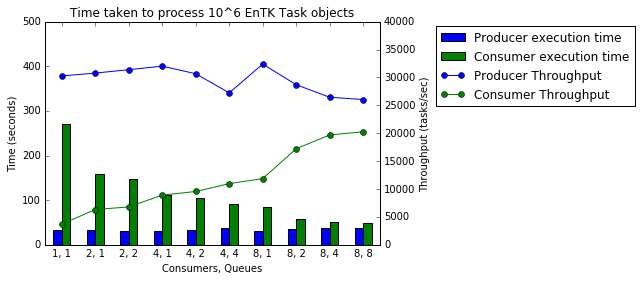

In [21]:
# Plot dataframe

ax = df.plot(kind='bar', ylim=(0,500), y=['Producer execution time','Consumer execution time'], title= 'Time taken to process 10^6 EnTK Task objects')
ax1 = df.plot(ax=ax, kind='line', y=['Producer Throughput', 'Consumer Throughput'], secondary_y=True, marker='o')
ax.set_xlabel('Consumers, Queues')
ax.set_ylabel('Time (seconds)')
ax1.set_ylim(0,40000)
ax1.set_ylabel('Throughput (tasks/sec)')
ax.set_xlim(-0.5, 9.5)
plt.xticks(rotation=0)

p1, l1 = ax.get_legend_handles_labels()
p2, l2 = ax1.get_legend_handles_labels()

patches = p1 + p2
labels = l1 + l2

ax.legend(patches,labels, loc='center left', bbox_to_anchor=(1.15, 0.8))